<b><font size=6>Определение перспективного тарифа для телеком компании

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Открытие данных

In [1]:
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

# Обработка данных

## Проверка и приведение типов

In [2]:
print(calls.isna().sum())
print(internet.isna().sum())
print(messages.isna().sum())
print(users.isna().sum())
print(tariffs.isna().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
id              0
message_date    0
user_id         0
dtype: int64
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
import numpy as np
calls['id'] = calls['id'].astype('int')
calls['call_date'] = calls['call_date'].astype('datetime64[ns]')
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
del internet['Unnamed: 0']
internet['id'] = internet['id'].astype('int')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')
internet['session_date'] = internet['session_date'].astype('datetime64[ns]')

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
messages['id'] = messages['id'].astype('int')
messages['message_date'] = messages['message_date'].astype('datetime64[ns]')

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users[['churn_date','reg_date']] = users[['churn_date','reg_date']].astype('datetime64[ns]')

In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


## Сбор данных по пользователям

In [12]:
calls.head(10)

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000
5,10005,2018-11-02,0,1000
6,10006,2018-10-18,0,1000
7,10007,2018-08-22,19,1000
8,10008,2018-09-15,19,1000
9,10009,2018-08-15,0,1000


Выделим месяца для определения и создадим сводную таблицу.

In [13]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [14]:
calls_user_month = calls.pivot_table(index=['user_id','month'],
                                     values=['duration'], aggfunc=['count','sum']).rename(columns={'duration': 'total_calls'})

In [15]:
calls_user_month

count         sum
              total_calls total_calls
user_id month                        
1000    5              22         159
        6              43         172
        7              47         340
        8              52         408
        9              58         466
...                   ...         ...
1498    10             41         247
1499    9               9          70
        10             68         449
        11             74         612
        12             69         492

[3174 rows x 2 columns]

То же проделаем для смс и интернета.

In [16]:
messages.head(10)

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000
5,10005,2018-06-20,1000
6,10006,2018-11-19,1000
7,10007,2018-10-29,1000
8,10008,2018-06-25,1000
9,10009,2018-12-18,1000


In [17]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [18]:
messages_user_month = messages.pivot_table(index=['user_id','month'],
                                           values='id', aggfunc='count').rename(columns={'id': 'total_msg'})

In [19]:
messages_user_month

total_msg
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57
...                  ...
1498    10            42
1499    9             11
        10            48
        11            59
        12            66

[2717 rows x 1 columns]

In [20]:
internet.head(10)

,id,mb_used,session_date,user_id
0,10000,113,2018-11-25,1000
1,10001,1053,2018-09-07,1000
2,10002,1198,2018-06-25,1000
3,10003,551,2018-08-22,1000
4,10004,303,2018-09-24,1000
5,10005,400,2018-10-02,1000
6,10006,541,2018-09-07,1000
7,10007,416,2018-07-11,1000
8,10008,506,2018-10-08,1000
9,10009,346,2018-09-03,1000


In [21]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_user_month = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')

In [22]:
internet_user_month

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3203 rows x 1 columns]

Найдем прибыль по тарифам.

In [23]:
user_tariffs = users[['user_id','city','tariff']]
user_tariffs = user_tariffs.set_axis(['user_id', 'city', 'tariff_name'], axis=1, inplace=False)
user_tariffs

,user_id,city,tariff_name
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


In [24]:
full = calls_user_month.merge(messages_user_month, on=['user_id','month'], how='outer').reset_index()
full = full.merge(internet_user_month, on=['user_id','month'], how='outer')
full = full.merge(user_tariffs, on='user_id', how='outer', right_index=True)
full = full.set_axis(['user_id', 'month', 'total_calls', 'dur_calls', 'total_msg', 'total_mb', 'city', 'tariff_name'], axis=1, inplace=False)
full['city'] = full['city'].str.lower()
full = full.merge(tariffs, on='tariff_name', how='outer')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [25]:
full

,user_id,month,total_calls,dur_calls,total_msg,total_mb,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,2256.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23257.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14016.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14070.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14581.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,32.0,17232.0,санкт-петербург,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,NaN,21.0,19588.0,санкт-петербург,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,NaN,20.0,17516.0,санкт-петербург,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,NaN,35.0,17341.0,санкт-петербург,smart,50,15360,500,550,200,3,3


In [56]:
print(f'Кол-во клиентов: {full.user_id.nunique()}')

Кол-во клиентов: 498


In [26]:
full.isna().sum()

user_id                    0
month                      2
total_calls               42
dur_calls                 42
total_msg                499
total_mb                  13
city                       0
tariff_name                0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [27]:
full.query('month.isna()')

,user_id,month,total_calls,dur_calls,total_msg,total_mb,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,волжский,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,омск,smart,50,15360,500,550,200,3,3


In [28]:
print(calls.query('user_id == [1128,1371]'))
print(messages.query('user_id == [1128,1371]'))
print(internet.query('user_id == [1128,1371]'))
print(users.query('user_id == [1128,1371]'))

Empty DataFrame
Columns: [id, call_date, duration, user_id, month]
Index: []
Empty DataFrame
Columns: [id, message_date, user_id, month]
Index: []
Empty DataFrame
Columns: [id, mb_used, session_date, user_id, month]
Index: []
     user_id  age churn_date      city first_name last_name   reg_date tariff
128     1128   51 2018-12-23  Волжский     Ксения    Агаева 2018-12-15  ultra
371     1371   50 2018-12-30      Омск     Ириней  Трофимов 2018-12-25  smart


Подключили тариф и ни разу не использовали? Тогда можем спокойно убирать из списка.

In [29]:
full.dropna(subset=['month'], inplace=True)

In [30]:
full = full.fillna(0)

In [31]:
full[['month','total_calls','dur_calls','total_msg','total_mb']] = full[['month','total_calls','dur_calls','total_msg','total_mb']].astype('int')

In [32]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [33]:
def price(row):
    fee = 0
    fee += row['rub_monthly_fee']
    if row['messages_included'] < row['total_msg']:
        fee += (row['total_msg'] - row['messages_included']) * row['rub_per_message']
    if row['minutes_included'] < row['dur_calls']:
        fee += (row['dur_calls'] - row['minutes_included']) * row['rub_per_minute']
    if row['mb_per_month_included'] < row['total_mb']:
        fee += np.ceil((row['total_mb'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    return fee

In [34]:
full['total_fee'] = full.apply(price, axis = 1)

In [57]:
full['total_fee'].describe()

count    3214.000000
mean     1532.592097
std       799.651454
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: total_fee, dtype: float64

In [35]:
full.query('total_fee > rub_monthly_fee')

,user_id,month,total_calls,dur_calls,total_msg,total_mb,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_fee
50,1024,11,157,1146,0,43146,санкт-петербург,ultra,1000,30720,3000,1950,150,1,1,3900.0
51,1024,12,136,949,0,35985,санкт-петербург,ultra,1000,30720,3000,1950,150,1,1,2850.0
78,1050,7,35,209,52,35205,тюмень,ultra,1000,30720,3000,1950,150,1,1,2700.0
97,1060,12,184,1233,52,43973,калуга,ultra,1000,30720,3000,1950,150,1,1,3900.0
211,1124,10,152,1225,121,49789,махачкала,ultra,1000,30720,3000,1950,150,1,1,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1499,12,69,492,66,13077,пермь,smart,50,15360,500,550,200,3,3,598.0
3211,1489,9,0,0,32,17232,санкт-петербург,smart,50,15360,500,550,200,3,3,950.0
3212,1489,10,0,0,21,19588,санкт-петербург,smart,50,15360,500,550,200,3,3,1550.0
3213,1489,11,0,0,20,17516,санкт-петербург,smart,50,15360,500,550,200,3,3,1150.0


# Анализ данных

In [36]:
smart = full.query('tariff_name == "smart"')[['dur_calls','total_msg','total_mb']].reset_index()
ultra = full.query('tariff_name == "ultra"')[['dur_calls','total_msg','total_mb']].reset_index()

In [37]:
smart.describe()

,index,dur_calls,total_msg,total_mb
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,2100.000000,417.934948,33.384029,16229.188425
std,643.601196,190.313730,28.227876,5877.576978
min,986.000000,0.000000,0.000000,0.000000
25%,1543.000000,282.000000,10.000000,12658.000000
50%,2100.000000,422.000000,28.000000,16531.000000
75%,2657.000000,545.000000,51.000000,20068.000000
max,3214.000000,1435.000000,143.000000,38610.000000


In [38]:
ultra.describe()

,index,dur_calls,total_msg,total_mb
count,985.000000,985.000000,985.000000,985.000000
mean,492.000000,526.623350,49.363452,19486.901523
std,284.489309,317.606098,47.804457,10096.317202
min,0.000000,0.000000,0.000000,0.000000
25%,246.000000,284.000000,6.000000,11785.000000
50%,492.000000,518.000000,38.000000,19324.000000
75%,738.000000,752.000000,79.000000,26863.000000
max,984.000000,1673.000000,224.000000,49789.000000


Среднее и отклонение нашли, дело за дисперсией.

In [39]:
np.var(smart)

index        4.140367e+05
dur_calls    3.620307e+04
total_msg    7.964555e+02
total_mb     3.453041e+07
dtype: float64

In [40]:
np.var(ultra)

index        8.085200e+04
dur_calls    1.007712e+05
total_msg    2.282946e+03
total_mb     1.018321e+08
dtype: float64

In [41]:
import matplotlib.pyplot as plt

def histo(col, title):
    plt.figure(figsize=(15,10))
    plt.title(title)
    smart[col].plot(kind='hist', bins=100, label='Тариф Smart')
    ultra[col].plot(kind='hist', bins=100, label='Тариф Ultra')
    plt.axvline(np.mean(smart[col]), color='r', label='Smart среднее')
    plt.axvline(np.mean(ultra[col]), color='y', label='Ultra среднее')
    plt.grid()
    plt.legend()

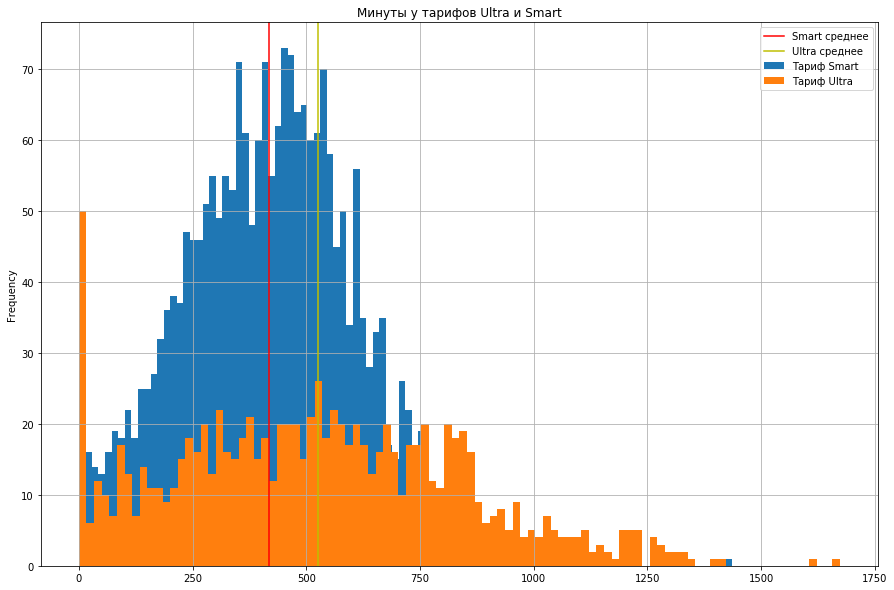

In [42]:
histo('dur_calls','Минуты у тарифов Ultra и Smart')

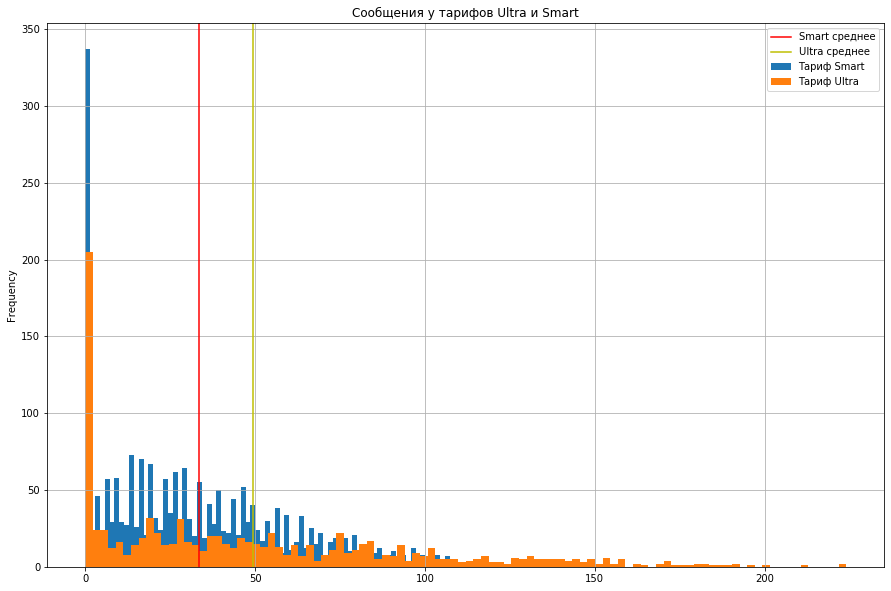

In [43]:
histo('total_msg','Сообщения у тарифов Ultra и Smart')

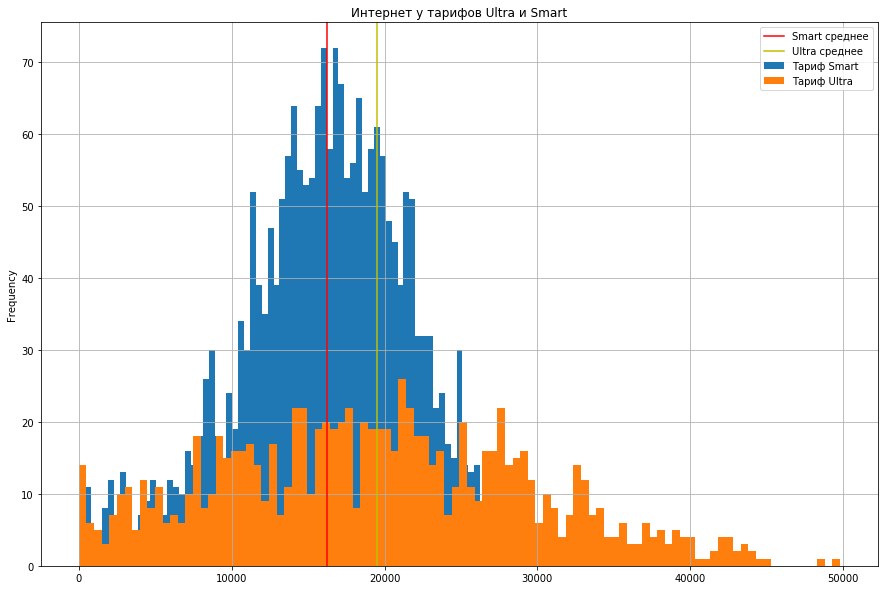

In [44]:
histo('total_mb','Интернет у тарифов Ultra и Smart')

Итого по средним значениям получаем:

- пользователи Smart выговаривают около 400 минут, пользователи Ultra - 500;
- Smart'овцы потребляют порядка 16 гигабайт, Ultra'сы более 19 гигабайт;
- за Smart'ом видим 33 смс, за Ultra - 49.

И исходя из разбивочных значений видим что пользователи из своих тарифов выжимают максимум только в плане интернета. Остального им слишком много.

In [45]:
# Как вариант можно улучшить смарт-тариф если выполнится одно условие - сумма докупок среди смартов не будет слишком большой.
# Тогда можно накинуть 1-2 гб, уменьшив количество минут и смс, но тем самым увеличив цену тарифа за счет трафика.
# Тогда постоянная плата смартов будет суммарно выше ситуативных доплат.
# Но тут важно учесть и данные по ультрам - если граница смарта подойдет слишком близко к средним ультрам,
# ультры просто перебегут в смарт и это будет огромной потерей. Так что + 1гб и 100 рублей, не более.

# Проверка гипотез

## Гипотеза 1

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Тогда за нулевую гипотезу берем: средняя выручка пользователей тарифов Смарт и Ультра равна, а за альтернативную гипотезу: средняя выручка пользователей тарифа Смарт меньше Ультра.

In [46]:
smart_fee = full.query('tariff_name == "smart"')[['month','total_fee']].reset_index()
ultra_fee = full.query('tariff_name == "ultra"')[['month','total_fee']].reset_index()

In [47]:
smart_fee['total_fee'].mean()

1294.6393001345896

In [48]:
ultra_fee['total_fee'].mean()

2071.0659898477156

Так как средние у нас и близко не равны, берем метод ttest_ind.

In [49]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(smart_fee['total_fee'], ultra_fee['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Мы видим, что средняя выручка в тарифах различается. Отвергаем нулевую гипотезу

## Гипотеза 2

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза: средняя выручка в Москве такая же как в других регионах, альтернативная: средняя выручка в Москве больше.

In [50]:
full['city'].unique()

array(['краснодар', 'москва', 'новокузнецк', 'иваново', 'омск', 'уфа',
       'томск', 'санкт-петербург', 'тверь', 'ярославль', 'тюмень',
       'ростов-на-дону', 'калуга', 'тула', 'волгоград', 'саранск',
       'иркутск', 'череповец', 'новосибирск', 'брянск', 'тольятти',
       'нижний тагил', 'воронеж', 'махачкала', 'пермь', 'сургут', 'пенза',
       'мурманск', 'набережные челны', 'самара', 'нижний новгород',
       'кемерово', 'кострома', 'оренбург', 'магнитогорск', 'астрахань',
       'нижневартовск', 'челябинск', 'курган', 'красноярск',
       'владивосток', 'смоленск', 'владимир', 'казань', 'саратов',
       'севастополь', 'рязань', 'екатеринбург', 'стерлитамак',
       'ульяновск', 'балашиха', 'барнаул', 'киров', 'сочи', 'вологда',
       'чебоксары', 'чита', 'петрозаводск', 'хабаровск', 'ставрополь',
       'улан-удэ', 'курск', 'якутск', 'химки', 'владикавказ', 'ижевск',
       'орёл', 'белгород', 'архангельск', 'липецк', 'волжский', 'тамбов',
       'калининград', 'новороссий

In [51]:
moscow = full.query('city == "москва"').reset_index()
other = full.query('city != "москва"').reset_index()

In [52]:
moscow['total_fee'].mean()

1550.8052373158755

In [53]:
other['total_fee'].mean()

1528.3169419900116

In [54]:
alpha = 0.05
results = st.ttest_ind(moscow['total_fee'], other['total_fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Что Москва, что не Москва - разница одно название.

# Вывод

После проведенных исследований можем смело сказать что тариф Ultra выгоднее для компании - прибыль от них значительно больше, при гораздо меньшем количестве пользователей.